#### Connect To Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cd /content/drive/MyDrive/MachineLearning/CapstoneProject

## Reading required files

#### Reading Train Annotations

In [ ]:
import pandas as pd
annotationsTrainDF = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Train Annotations.csv")
annotationsTrainDF.rename(columns = {'Bounding Box coordinates':'xmin'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 2':'ymin'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 3':'xmax'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 4':'ymax'}, inplace = True)
annotationsTrainDF.rename(columns = {'Image class':'Image_class'}, inplace = True)
annotationsTrainDF.rename(columns = {'Image Name':'Image_Name'}, inplace = True)
annotationsTrainDF

Image_Name  xmin  ymin  xmax  ymax  Image_class
0     00001.jpg    39   116   569   375           14
1     00002.jpg    36   116   868   587            3
2     00003.jpg    85   109   601   381           91
3     00004.jpg   621   393  1484  1096          134
4     00005.jpg    14    36   133    99          106
...         ...   ...   ...   ...   ...          ...
8139  08140.jpg     3    44   423   336           78
8140  08141.jpg   138   150   706   523          196
8141  08142.jpg    26   246   660   449          163
8142  08143.jpg    78   526  1489   908          112
8143  08144.jpg    20   240   862   677           17

[8144 rows x 6 columns]

  Annotation DF contains bounding box co ordinates and image class, this if for train data

#### Reading Test Annotations

In [ ]:
import pandas as pd
annotationsTestDF = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Test Annotation.csv")
annotationsTestDF.rename(columns = {'Bounding Box coordinates':'xmin'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 2':'ymin'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 3':'xmax'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 4':'ymax'}, inplace = True)
annotationsTestDF.rename(columns = {'Image class':'Image_class'}, inplace = True)
annotationsTestDF.rename(columns = {'Image Name':'Image_Name'}, inplace = True)
annotationsTestDF

Image_Name  xmin  ymin  xmax  ymax  Image_class
0     00001.jpg    30    52   246   147          181
1     00002.jpg   100    19   576   203          103
2     00003.jpg    51   105   968   659          145
3     00004.jpg    67    84   581   407          187
4     00005.jpg   140   151   593   339          185
...         ...   ...   ...   ...   ...          ...
8036  08037.jpg    49    57  1169   669           63
8037  08038.jpg    23    18   640   459           16
8038  08039.jpg    33    27   602   252           17
8039  08040.jpg    33   142   521   376           38
8040  08041.jpg    77    73   506   380           32

[8041 rows x 6 columns]

  Annotation DF contains bounding box co ordinates and image class, this if for test data

## Image Segregation

#### Using Split-folder to create train and validation files

  Below cells are commented, we need to create 2 directories, one for train and other for validation. These images will be used for training and validation. we use split folder libraries to get 2 directories with 80-20 split and get the images copied to each of folder

  The below lines are commented since we don't have to run this every time we start the notebook. Should be uncommented it the notebook is run for first time. Approrpiately change the directories names as you start running the note book

  In below cell we have copied the images from shortcut and create 2 directories as required.

In [ ]:
# !mkdir /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1
# !cp -r /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1

using split-folder library to split the data

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders # or import splitfolders
# input_folder = "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/"
# output = "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/" #where you want the split datasets saved. one will be created if it does not exist or none is set

# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

## Creating data required for training

#### Creating list containing files and folder names for training 

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
trainDataSetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/*/*"
#reading png files in the path
trainList = glob.glob(trainDataSetPath)
print(trainList)

trainListPaths = []
for fileandFolder in trainList:
  lList = fileandFolder.split("/")[-2:]
  trainListPaths.append(lList)

print(len(trainListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/01518.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/03345.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/02067.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/01431.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/04215.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/02870.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/04538.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Spli

Above cell contains code to generate a list containing car names and folder path for Train related data

#### Creating list containing files and folder names for Validation

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
validationDatasetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/*/*"
#reading png files in the path
validationList = glob.glob(validationDatasetPath)
print(validationList)

validationListPaths = []
for fileandFolder in validationList:
  lList = fileandFolder.split("/")[-2:]
  validationListPaths.append(lList)

print(len(validationListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/05625.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00455.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00426.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01015.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01908.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01992.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00030.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 24

Above cell contains code to generate a list containing car names and folder path for validation related data

#### Creating list containing files and folder names for testing

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
testDataSetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/*/*"
#reading png files in the path
testList = glob.glob(testDataSetPath)
print(testList)

testListPaths = []
for fileandFolder in testList:
  lList = fileandFolder.split("/")[-2:]
  testListPaths.append(lList)

print(len(testListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00130.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01002.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00128.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01176.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00565.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00386.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01035.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00711.jpg',

Above cell contains code to generate a list containing car names and folder path for test related data

#### Creating Training dataframe

In [ ]:
dfTrain = pd.DataFrame(trainListPaths, columns = ['carName','imageName'])
dfTrain['carModel'] = dfTrain['carName'].str[-4:]
dfTrain['carModel_1'] = dfTrain['carName'].str[:-4]

In [ ]:
dfTrain[['carName','carModel','carModel_1','imageName']].head(1)

carName carModel        carModel_1  imageName
0  Volvo 240 Sedan 1993     1993  Volvo 240 Sedan   01518.jpg

Above cell contains code to generate a dataframe from train list create in above cells

#### Creating Validation dataframe

In [ ]:
dfValidation = pd.DataFrame(validationListPaths, columns = ['carName','imageName'])
dfValidation['carModel'] = dfValidation['carName'].str[-4:]
dfValidation['carModel_1'] = dfValidation['carName'].str[:-4]

In [ ]:
dfValidation[['carName','carModel','carModel_1','imageName']].head(1)

carName carModel        carModel_1  imageName
0  Volvo 240 Sedan 1993     1993  Volvo 240 Sedan   05625.jpg

Above cell contains code to generate a dataframe from validation list

#### Creating Testing dataframe

In [ ]:
dfTest = pd.DataFrame(testListPaths, columns = ['carName','imageName'])
dfTest['carModel'] = dfTest['carName'].str[-4:]
dfTest['carModel_1'] = dfTest['carName'].str[:-4]

In [ ]:
dfTest[['carName','carModel','carModel_1','imageName']].head(1)

carName carModel             carModel_1  imageName
0  Acura Integra Type R 2001     2001  Acura Integra Type R   00130.jpg

Above cell contains code to generate a dataframe from test list

#### Merging train dataframe with annotations

In [ ]:
train_df = dfTrain.merge(annotationsTrainDF, how='inner', left_on='imageName', right_on='Image_Name')
train_df = train_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train')

In [ ]:
train_df.head(1)

carName  ...                                         image_path
0  Volvo 240 Sedan 1993  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 11 columns]

Here we are merging the code to create a unified dataframe.


For Preprocessing images, below mentioned simple 3 steps are followed.

Reading images from images folder

Reading annotation file

Extracting image height and width

Merging image annotation dataset with data produced in above 2 steps.


The same is done for validation and test in below few cells

#### Merging Validation dataframe with annotations

In [ ]:
val_df = dfValidation.merge(annotationsTrainDF, how='inner', left_on='imageName', right_on='Image_Name')
val_df = val_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val')

In [ ]:
val_df.head(1)

carName  ...                                         image_path
0  Volvo 240 Sedan 1993  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 11 columns]

#### Merging test dataframe with annotations

In [ ]:
test_df = dfTest.merge(annotationsTestDF, how='inner', left_on='imageName', right_on='Image_Name')
test_df = test_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images')

In [ ]:
test_df.head(1)

carName  ...                                         image_path
0  Acura Integra Type R 2001  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 11 columns]

#### Checking basic details of dataframe

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6442 entries, 0 to 6441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      6442 non-null   object
 1   imageName    6442 non-null   object
 2   carModel     6442 non-null   object
 3   carModel_1   6442 non-null   object
 4   Image_Name   6442 non-null   object
 5   xmin         6442 non-null   int64 
 6   ymin         6442 non-null   int64 
 7   xmax         6442 non-null   int64 
 8   ymax         6442 non-null   int64 
 9   Image_class  6442 non-null   int64 
 10  image_path   6442 non-null   object
dtypes: int64(5), object(6)
memory usage: 603.9+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      1702 non-null   object
 1   imageName    1702 non-null   object
 2   carModel     1702 non-null   object
 3   carModel_1   1702 non-null   object
 4   Image_Name   1702 non-null   object
 5   xmin         1702 non-null   int64 
 6   ymin         1702 non-null   int64 
 7   xmax         1702 non-null   int64 
 8   ymax         1702 non-null   int64 
 9   Image_class  1702 non-null   int64 
 10  image_path   1702 non-null   object
dtypes: int64(5), object(6)
memory usage: 159.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8041 entries, 0 to 8040
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      8041 non-null   object
 1   imageName    8041 non-null   object
 2   carModel     8041 non-null   object
 3   carModel_1   8041 non-null   object
 4   Image_Name   8041 non-null   object
 5   xmin         8041 non-null   int64 
 6   ymin         8041 non-null   int64 
 7   xmax         8041 non-null   int64 
 8   ymax         8041 non-null   int64 
 9   Image_class  8041 non-null   int64 
 10  image_path   8041 non-null   object
dtypes: int64(5), object(6)
memory usage: 753.8+ KB


#### Label encoding the car names for classification purpose

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
train_df['le_carName']= label_encoder.fit_transform(train_df['carName'])
val_df['le_carName']= label_encoder.fit_transform(val_df['carName'])
test_df['le_carName']= label_encoder.fit_transform(test_df['carName'])

we are doing  encoding on the car names and we will be using it for train purpose. We need this as we observed a problem in the "Class" column in the annotation dataframe.

#### Extracting the height and width of the images from Train set

In below cells we are calculating the height and width of each image.

This particular process is time consuming.

So we are planning to do it one time, save it in a CSV file and use it whenever needed.


If you are running this notebook for first time then please uncomment this part and then save the file. This will atleast take **1 hour** for **train data** and **one more hour** for **test data**

In [ ]:
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np
# import pandas as pd

# h = []
# w =[]

# mypath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/"

# for row in dfMerged.itertuples(index=False, name=None):
#   # print(config.IMAGES_PATH + "/" + row[0] + "/" + row[1])
#   imagePath = (mypath  + "/" + row[0] + "/" + row[1])#os.path.sep.join([config.IMAGES_PATH, filename])
#   image = cv2.imread(imagePath)
#   h.append(image.shape[:2][0])
#   w.append(image.shape[:2][1])

In [ ]:
# dfTrain['Height'] = h
# dfTrain['Width'] = w
# dfTrain.to_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/train_8144_images.csv")
# dfTrain_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/train_8144_images.csv")

#### Extracting the height and width of the images from Test set

In [ ]:
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np
# import pandas as pd

# h = []
# w =[]

# mypath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images"

# for row in test_df[['carName','imageName']].itertuples(index=False, name=None):
#   # print(config.IMAGES_PATH + "/" + row[0] + "/" + row[1])
#   imagePath = (mypath  + "/" + row[0] + "/" + row[1])#os.path.sep.join([config.IMAGES_PATH, filename])
#   image = cv2.imread(imagePath)
#   h.append(image.shape[:2][0])
#   w.append(image.shape[:2][1])

In [ ]:
# dfTest['Height'] = h
# dfTest['Width'] = w
# dfTest.to_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/test_8041_images.csv")
# dfTest_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/test_8041_images.csv"")

#### Creating Train and validation dataframe with width and height

In [ ]:
dfTrain_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/train_8144_images.csv")
dfTrain_W_H = dfTrain_W_H[['Height','Width','Image_Name']]
train_df = train_df.merge(dfTrain_W_H, how='inner', left_on='imageName', right_on='Image_Name')
train_df['File'] = train_df['image_path'] + "/" + train_df['carName'] + "/" + train_df['imageName']
train_df.rename(columns = {'Image_class':'Class'}, inplace = True)
train_df.rename(columns = {'le_carName':'Label'}, inplace = True)
train_df.head(1)

carName  ...                                               File
0  Volvo 240 Sedan 1993  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 16 columns]

In above cell we have unified all the things which are needed and created one dataframe which is going to be used for training.

In [ ]:
val_df = val_df.merge(dfTrain_W_H, how='inner', left_on='imageName', right_on='Image_Name')
val_df['File'] = val_df['image_path'] + "/" + val_df['carName'] + "/" + val_df['imageName']
val_df.rename(columns = {'Image_class':'Class'}, inplace = True)
val_df.rename(columns = {'le_carName':'Label'}, inplace = True)
val_df.head(1)

carName  ...                                               File
0  Volvo 240 Sedan 1993  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 16 columns]

In above cell we have unified all the things which are needed and created one dataframe which is going to be used for validation.

#### Creating Test dataframe with width and height

In [ ]:
test_df.head(2)

carName  ... le_carName
0  Acura Integra Type R 2001  ...          1
1  Acura Integra Type R 2001  ...          1

[2 rows x 12 columns]

In [ ]:
dfTest_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/test_8041_images.csv")
# dfTest_W_H
dfTest_W_H = dfTest_W_H[['Height','Width','imageName']]
test_df = test_df.merge(dfTest_W_H, how='inner', left_on='imageName', right_on='imageName')
test_df['File'] = test_df['image_path'] + "/" + test_df['carName'] + "/" + test_df['imageName']
test_df.rename(columns = {'Image_class':'Class'}, inplace = True)
test_df.rename(columns = {'le_carName':'Label'}, inplace = True)
test_df.head(1)

carName  ...                                               File
0  Acura Integra Type R 2001  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 15 columns]

In above cell we have unified all the things which are needed and created one dataframe which is going to be used for testing.

## EDA

In [ ]:
#Add code for getting entire test data
trainDataSetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/*/*"
#reading png files in the path
trainList = glob.glob(trainDataSetPath)
print(trainList)

trainListPaths_EDA = []
for fileandFolder in trainList:
  lList = fileandFolder.split("/")[-2:]
  trainListPaths_EDA.append(lList)

print(len(trainListPaths_EDA))

dfTrain_EDA = pd.DataFrame(trainListPaths_EDA, columns = ['carName','imageName'])
dfTrain_EDA['carModel'] = dfTrain_EDA['carName'].str[-4:]
dfTrain_EDA['carModel_1'] = dfTrain_EDA['carName'].str[:-4]

train_df_EDA = dfTrain_EDA.merge(annotationsTrainDF, how='inner', left_on='imageName', right_on='Image_Name')
train_df_EDA = train_df_EDA.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/')



['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/02344.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/01431.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/07067.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/01853.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/05376.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/03613.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/Volvo 240 Sedan 1993/04538.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Imag

In [ ]:
def value_counts_df(df, col):
    """
    Returns pd.value_counts() as a DataFrame

    Parameters
    ----------
    df : Pandas Dataframe
        Dataframe on which to run value_counts(), must have column `col`.
    col : str
        Name of column in `df` for which to generate counts

    Returns
    -------
    Pandas Dataframe
        Returned dataframe will have a single column named "count" which contains the count_values()
        for each unique value of df[col]. The index name of this dataframe is `col`.

    """
    df = pd.DataFrame(df[col].value_counts())
    df.index.name = col
    df.columns = ['count']
    return df


carsCountDataFrame = value_counts_df(train_df_EDA,'carName')

In [ ]:
carsCountDataFrame.head(5)

count
carName                                        
GMC Savana Van 2012                          68
Chrysler 300 SRT-8 2010                      49
Mitsubishi Lancer Sedan 2012                 48
Mercedes-Benz 300-Class Convertible 1993     48
Chevrolet Corvette ZR1 2012                  47

Train dataframe : Above table shows the class of cars which are having more number of images.

In [ ]:
carsCountDataFrame.tail(5)

count
carName                                                  
Rolls-Royce Phantom Drophead Coupe Convertible ...     31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24

Train dataframe : Above table shows the class of cars which are having less number of images.

In [ ]:
carsCountDataFrame_test = value_counts_df(test_df,'carName')

In [ ]:
carsCountDataFrame_test.head(5)

count
carName                                        
GMC Savana Van 2012                          68
Mercedes-Benz 300-Class Convertible 1993     48
Chrysler 300 SRT-8 2010                      48
Mitsubishi Lancer Sedan 2012                 47
Chevrolet Corvette ZR1 2012                  46

Test dataframe : Above table shows the class of cars which are having more number of images.

In [ ]:
carsCountDataFrame_test.tail(5)

count
carName                                                  
Rolls-Royce Phantom Drophead Coupe Convertible ...     30
Maybach Landaulet Convertible 2012                     29
Chevrolet Express Cargo Van 2007                       29
FIAT 500 Abarth 2012                                   27
Hyundai Accent Sedan 2012                              24

Test dataframe : Above table shows the class of cars which are having less number of images.

In [ ]:
train_df_EDA['carModel'].value_counts().index

Index(['2012', '2007', '2009', '2010', '2011', '2008', '1993', '1994', '1998',
       '2001', '2006', '1991', '2000', '2002', '1997', '1999'],
      dtype='object')

Above cell show which are unique carModel (year of make) we are having in the given dataset

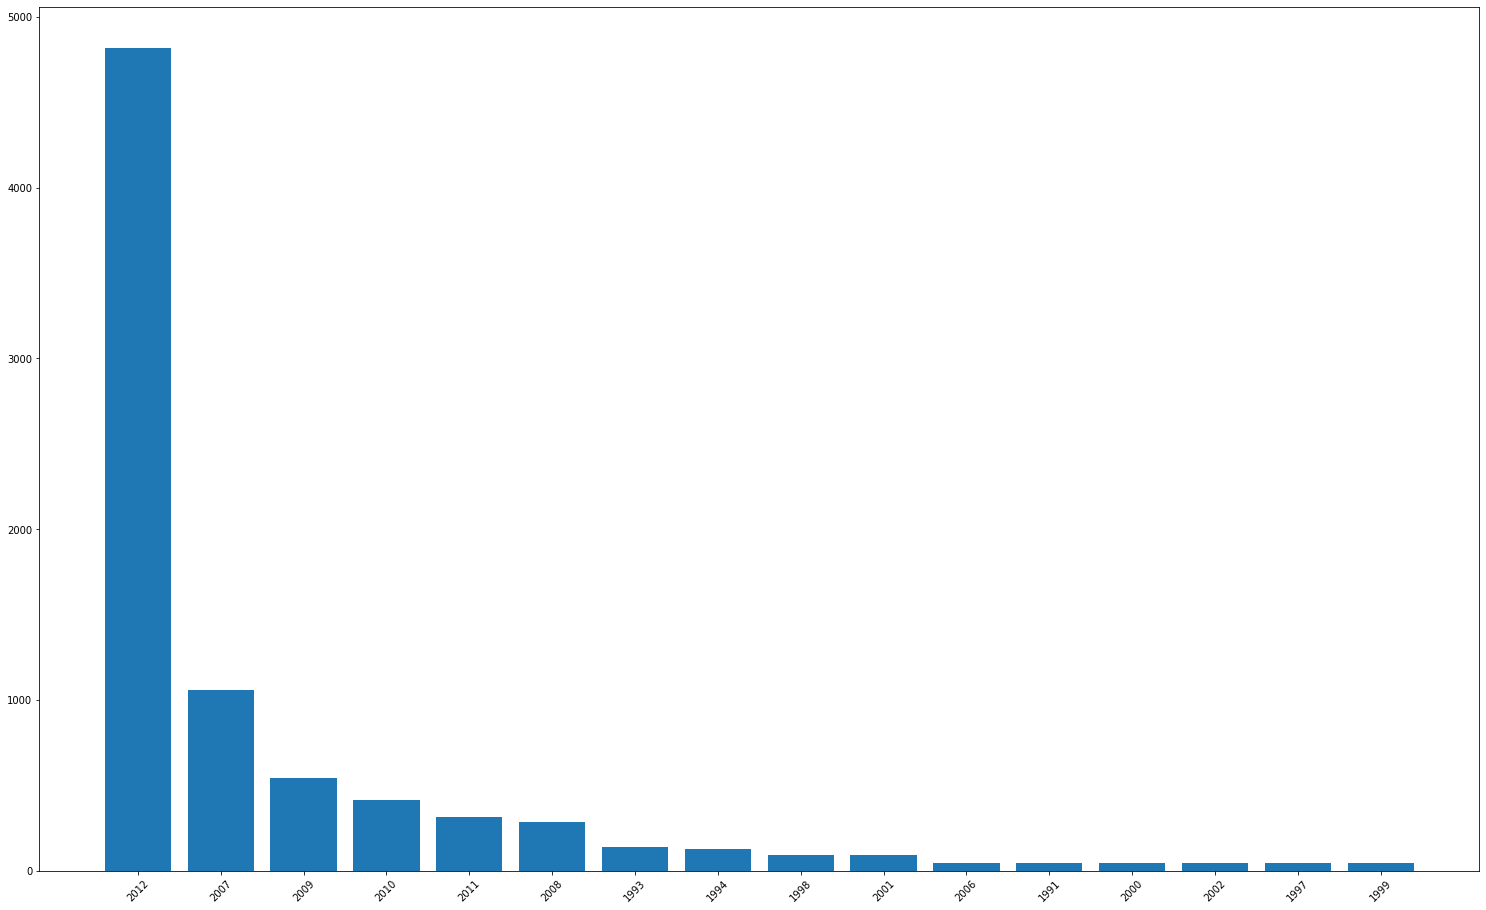

In [ ]:
# train_df['carName'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
ax = fig.add_axes([0,0,1,1])
carModel = train_df_EDA['carModel'].value_counts().index
carCounts = train_df_EDA['carModel'].value_counts()
ax.bar(carModel,carCounts)
plt.xticks(rotation=45)
plt.show()

Below mentioned picture depicts the number of car images based on car model year. There are more images of cars which are of model 2012 and very less images belonging to model 1996.

In [ ]:
carCounts

2012    4818
2007    1059
2009     540
2010     413
2011     312
2008     283
1993     139
1994     128
1998      92
2001      90
2006      46
1991      46
2000      45
2002      45
1997      44
1999      44
Name: carModel, dtype: int64

Almost all classes of cars images have an equal number of images which is of count around 40. There is a class named “GMC savana van 2012” which has 60 images and “Hyundai Accent sedan 2012” which has around 25 images. In below mentioned pictures we can view the class distribution.

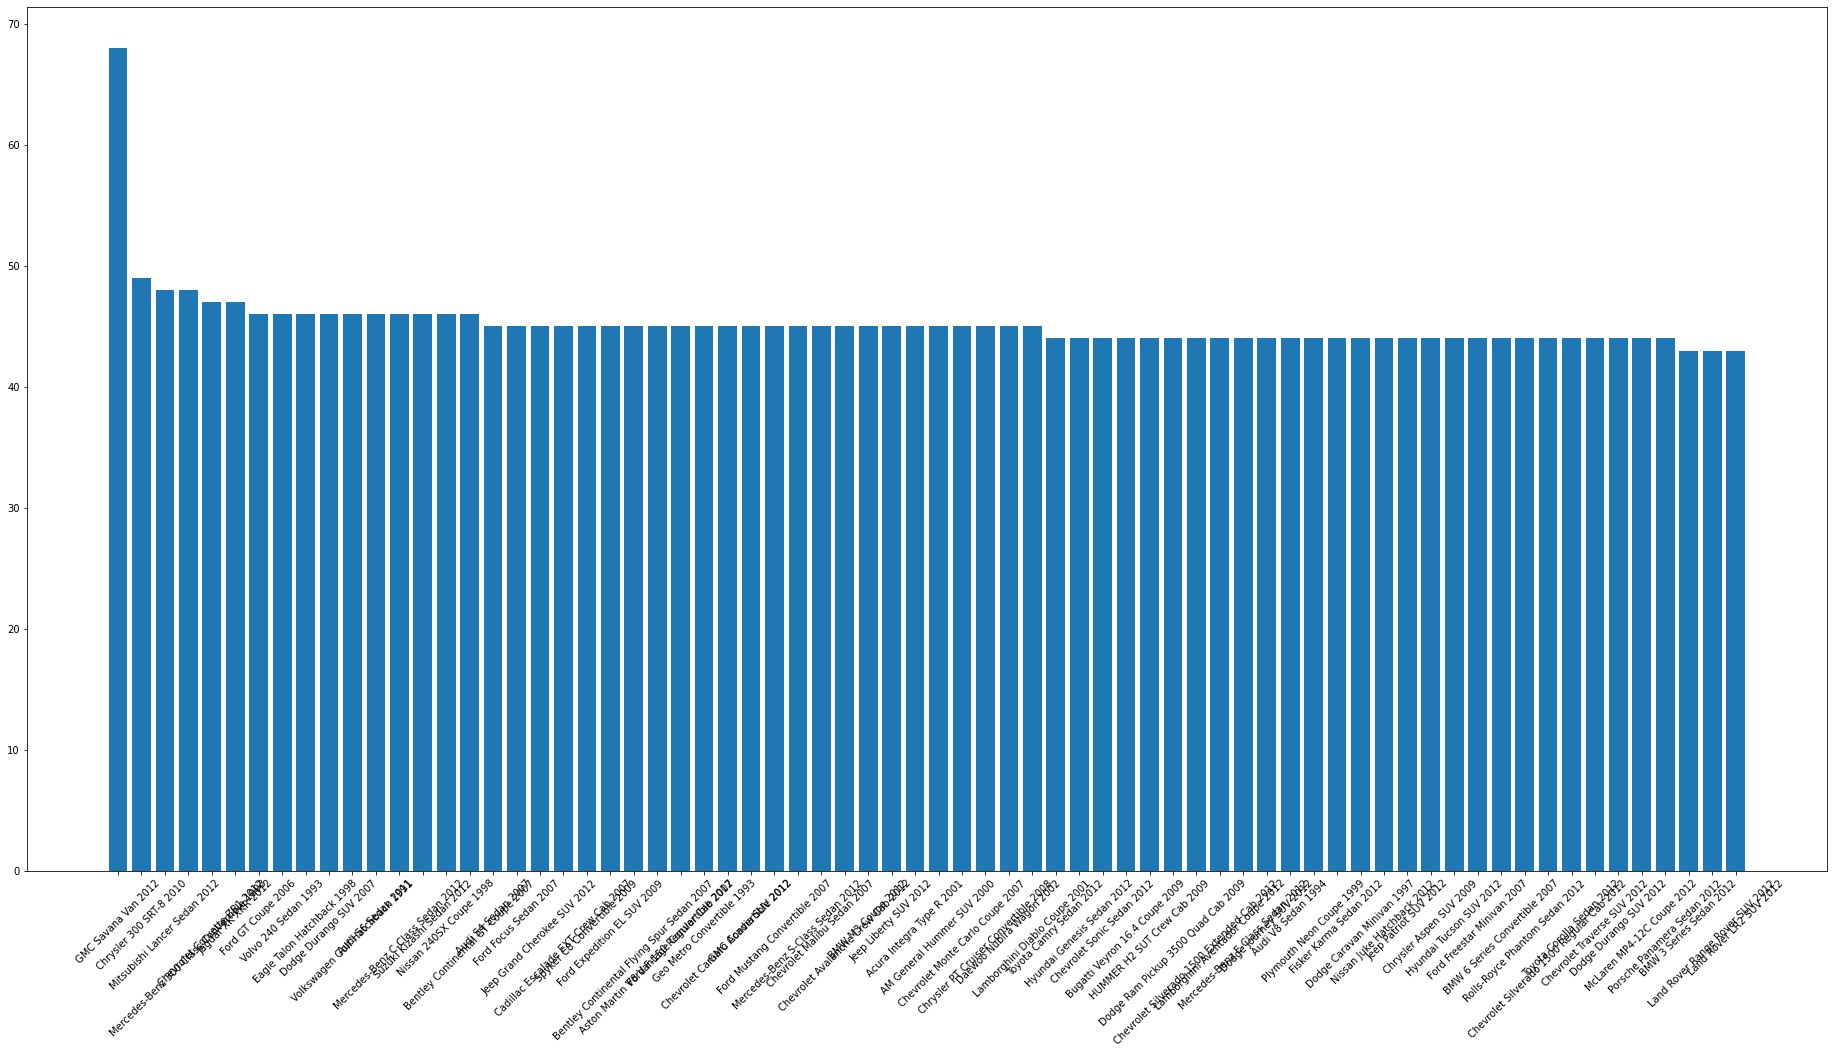

In [ ]:
# train_df['carName'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,12))
ax = fig.add_axes([0,0,1,1])
carNames = carsCountDataFrame.iloc[:70,:].index
carCounts = carsCountDataFrame.iloc[:70,:]['count']
ax.bar(carNames,carCounts)
plt.xticks(rotation=45)
plt.show()

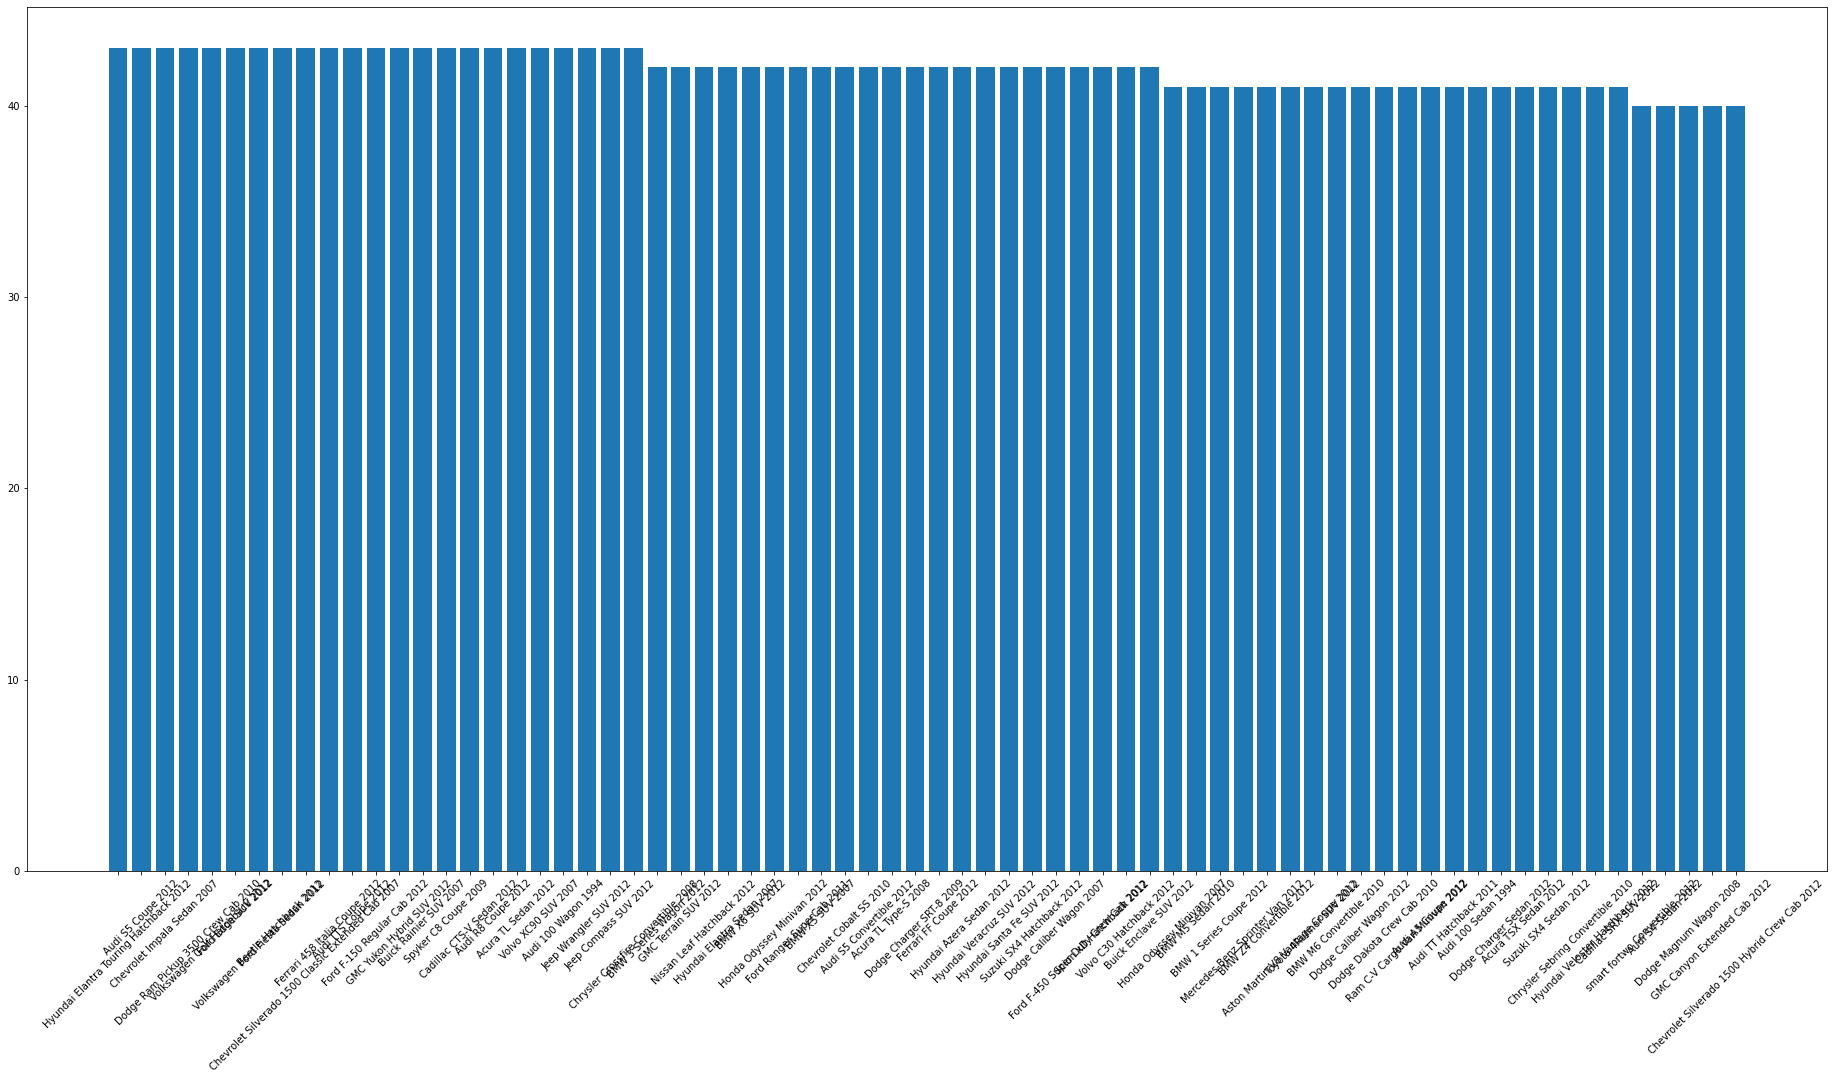

In [ ]:
# train_df['carName'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,12))
ax = fig.add_axes([0,0,1,1])
carNames = carsCountDataFrame.iloc[70:140,:].index
carCounts = carsCountDataFrame.iloc[70:140,:]['count']
ax.bar(carNames,carCounts)
plt.xticks(rotation=45)
plt.show()

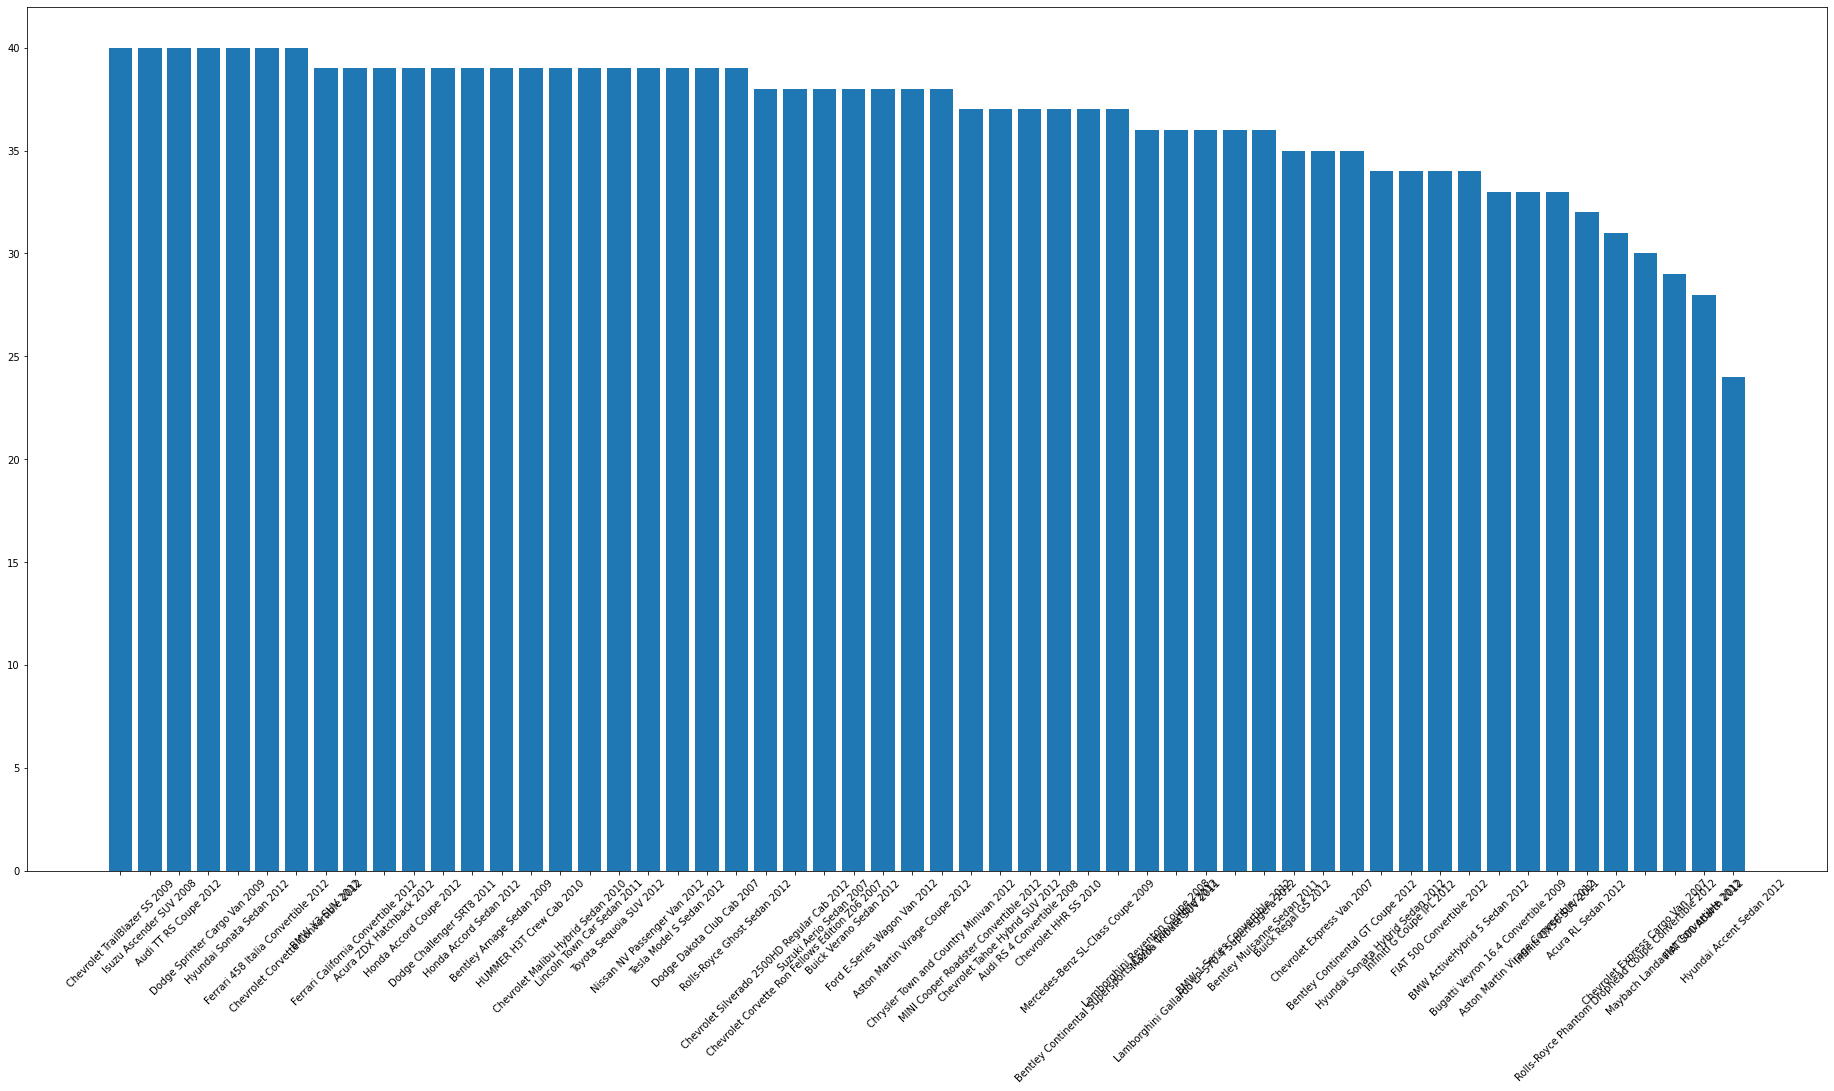

In [ ]:
# train_df['carName'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,12))
ax = fig.add_axes([0,0,1,1])
carNames = carsCountDataFrame.iloc[140:,:].index
carCounts = carsCountDataFrame.iloc[140:,:]['count']
ax.bar(carNames,carCounts)
plt.xticks(rotation=45)
plt.show()

In [ ]:
dfTrain_W_H = dfTrain_W_H[['Height','Width','Image_Name']]
train_df_EDA = train_df_EDA.merge(dfTrain_W_H, how='inner', left_on='imageName', right_on='Image_Name')
train_df_EDA['File'] = train_df['image_path'] + "/" + train_df['carName'] + "/" + train_df['imageName']

train_df_EDA.rename(columns = {'Height_x':'Height'}, inplace = True)
train_df_EDA.rename(columns = {'Width_x':'Width'}, inplace = True)
train_df_EDA.rename(columns = {'Image_class':'Class'}, inplace = True)
train_df_EDA.rename(columns = {'le_carName':'Label'}, inplace = True)

In [ ]:
train_df_EDA.head(1)

carName  ...                                               File
0  Volvo 240 Sedan 1993  ...  /content/drive/MyDrive/MachineLearning/Capston...

[1 rows x 15 columns]

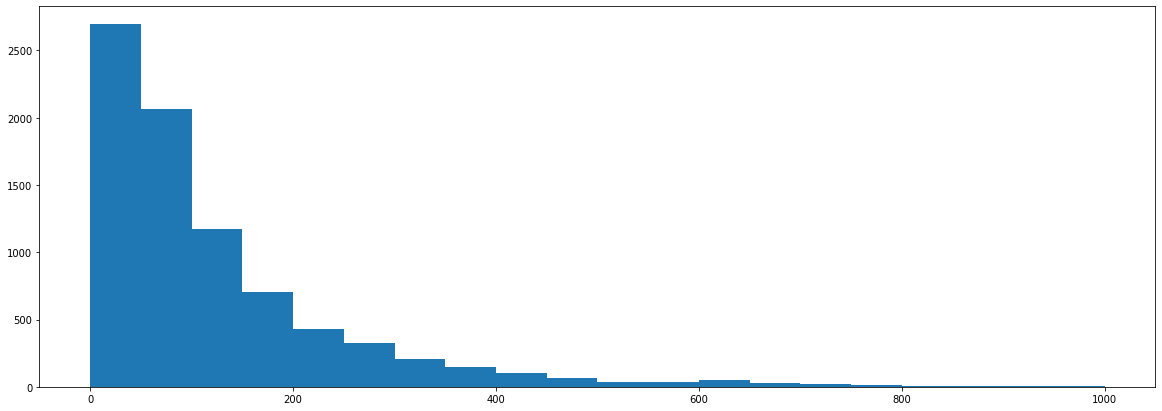

In [ ]:
train_df_EDA['Width_difference'] = train_df_EDA['Width'] - (train_df_EDA['xmax'] - train_df_EDA['xmin'])
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(train_df_EDA['Width_difference'], bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
 
# Show plot
plt.show()

Here we are planning to check if all instances of a images share the same location and orientation within the dataset. As it is observed from the graph the location of car within image varies and there are significant count of images where appearance of car is too small compared to the image itself. 

In [ ]:
train_df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 8143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   carName           8144 non-null   object
 1   imageName         8144 non-null   object
 2   carModel          8144 non-null   object
 3   carModel_1        8144 non-null   object
 4   Image_Name_x      8144 non-null   object
 5   xmin              8144 non-null   int64 
 6   ymin              8144 non-null   int64 
 7   xmax              8144 non-null   int64 
 8   ymax              8144 non-null   int64 
 9   Class             8144 non-null   int64 
 10  image_path        8144 non-null   object
 11  Height            8144 non-null   int64 
 12  Width             8144 non-null   int64 
 13  Image_Name_y      8144 non-null   object
 14  File              6442 non-null   object
 15  Width_difference  8144 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 1.1+ MB


In [ ]:
train_df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 8143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   carName           8144 non-null   object
 1   imageName         8144 non-null   object
 2   carModel          8144 non-null   object
 3   carModel_1        8144 non-null   object
 4   Image_Name_x      8144 non-null   object
 5   xmin              8144 non-null   int64 
 6   ymin              8144 non-null   int64 
 7   xmax              8144 non-null   int64 
 8   ymax              8144 non-null   int64 
 9   Class             8144 non-null   int64 
 10  image_path        8144 non-null   object
 11  Height            8144 non-null   int64 
 12  Width             8144 non-null   int64 
 13  Image_Name_y      8144 non-null   object
 14  File              6442 non-null   object
 15  Width_difference  8144 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 1.1+ MB


In [ ]:
train_df_EDA['size'] =  train_df_EDA.Height * train_df_EDA.Width
train_df_EDA[['carName','imageName','Height','Width']][train_df_EDA['size'] == train_df_EDA['size'].max()]

carName  imageName  Height  Width
2779  Chevrolet Sonic Sedan 2012  05945.jpg    3744   5616

Above cell shows the image which is of maximum size

Corresponding image is shown in below cell

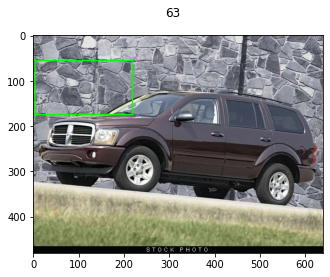

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = 2779
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df_EDA.loc[img_num,'File'])

w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)


#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df_EDA.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
train_df_EDA['size'] =  train_df_EDA.Height * train_df_EDA.Width
train_df_EDA[['carName','imageName','Height','Width']][train_df_EDA['size'] == train_df_EDA['size'].min()]

carName  imageName  Height  Width
2543  Chevrolet Corvette Ron Fellows Edition Z06 2007  07469.jpg      58     78
2558  Chevrolet Corvette Ron Fellows Edition Z06 2007  00097.jpg      58     78

Train Data:Above cell shows the image which is of Minimum size

Corresponding image is shown in below cell. This one of the sample image.

Image file :: /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Chrysler Aspen SUV 2009/03669.jpg
Image Height :: 58
Image Width :: 78
Image bounding box Min coordinate :: 3    7
Image bounding box Max coordinate :: 76    50


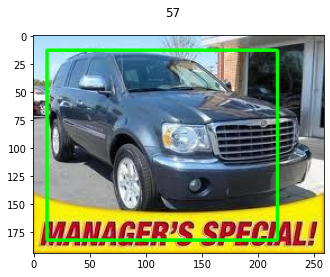

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = 2558
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df_EDA.loc[img_num,'File'])

w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image file ::", train_df_EDA.loc[img_num,'File'])
print("Image Height ::", train_df_EDA.loc[img_num,'Height'])
print("Image Width ::", train_df_EDA.loc[img_num,'Width'])
print("Image bounding box Min coordinate ::", train_df_EDA.loc[img_num,'xmin'], "  ", train_df_EDA.loc[img_num,'ymin'])
print("Image bounding box Max coordinate ::", train_df_EDA.loc[img_num,'xmax'], "  ", train_df_EDA.loc[img_num,'ymax'])

#Draw image using matplotlib
plt.suptitle(train_df_EDA.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
# test_df
test_df['size'] =  test_df.Height * test_df.Width
test_df[test_df['size'] == test_df['size'].max()]

carName  ...      size
2964  Chevrolet Tahoe Hybrid SUV 2012  ...  42120000

[1 rows x 16 columns]

Test Data:Above cell shows the image which is of Maximum size

Corresponding image is shown in below cell. This one of the sample image.

Image file :: /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Dodge Caliber Wagon 2012/03205.jpg
Image Height :: 332
Image Width :: 500
Image bounding box Min coordinate :: 119    68
Image bounding box Max coordinate :: 445    301


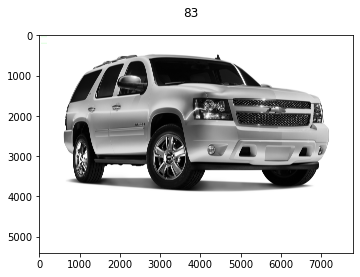

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = 2964
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(test_df.loc[img_num,'File'])
w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)


#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image file ::", train_df.loc[img_num,'File'])
print("Image Height ::", train_df.loc[img_num,'Height'])
print("Image Width ::", train_df.loc[img_num,'Width'])
print("Image bounding box Min coordinate ::", train_df.loc[img_num,'xmin'], "  ", train_df.loc[img_num,'ymin'])
print("Image bounding box Max coordinate ::", train_df.loc[img_num,'xmax'], "  ", train_df.loc[img_num,'ymax'])

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
test_df['size'] =  test_df.Height * test_df.Width
test_df[test_df['size'] == test_df['size'].min()]

carName  ...  size
263  AM General Hummer SUV 2000  ...  4141

[1 rows x 16 columns]

Test Data:Above cell shows the image which is of Minimum size

Corresponding image is shown in below cell. This one of the sample image.

Image file :: /content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Acura TSX Sedan 2012/04470.jpg
Image Height :: 200
Image Width :: 300
Image bounding box Min coordinate :: 19    49
Image bounding box Max coordinate :: 283    191


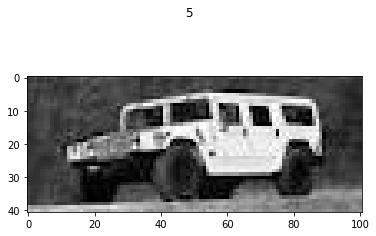

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = 263
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(test_df.loc[img_num,'File'])

w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image file ::", train_df.loc[img_num,'File'])
print("Image Height ::", train_df.loc[img_num,'Height'])
print("Image Width ::", train_df.loc[img_num,'Width'])
print("Image bounding box Min coordinate ::", train_df.loc[img_num,'xmin'], "  ", train_df.loc[img_num,'ymin'])
print("Image bounding box Max coordinate ::", train_df.loc[img_num,'xmax'], "  ", train_df.loc[img_num,'ymax'])

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
from numpy.linalg import norm

def brightness(img):
    if len(img.shape) == 3:
        # create brightness with euclidean norm
        return np.average(norm(img, axis=2)) / np.sqrt(3)
    else:
        # Grayscale
        return np.average(img)

In [ ]:
brightness(cv2.imread(train_df.loc[2,'File']))

86.88668007549715

Above cell shows overall brightness for one of the same data in train dataset

## Display sample data with bounding boxes

#### Display sample data for Train set images

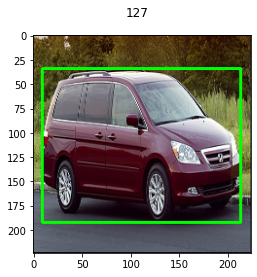

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

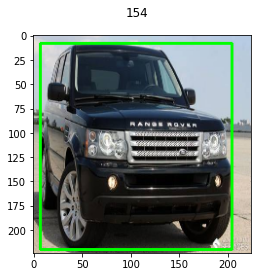

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

#### Display sample data for Test set images

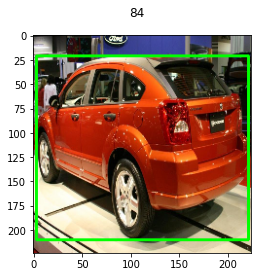

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, test_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(test_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = test_df.loc[img_num, 'Width']
h = test_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(test_df.loc[img_num, 'xmin']*x_ratio),int(test_df.loc[img_num, 'ymin']*y_ratio)),
             (int(test_df.loc[img_num, 'xmax']*x_ratio),int(test_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(test_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

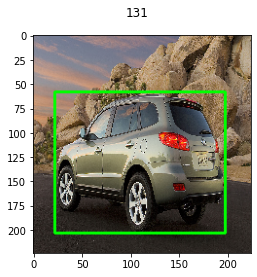

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, test_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(test_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = test_df.loc[img_num, 'Width']
h = test_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(test_df.loc[img_num, 'xmin']*x_ratio),int(test_df.loc[img_num, 'ymin']*y_ratio)),
             (int(test_df.loc[img_num, 'xmax']*x_ratio),int(test_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(test_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

#### Display sample data for Validation set images

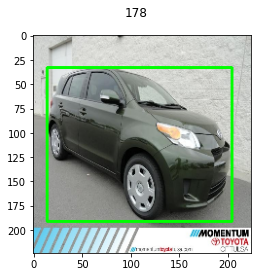

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, val_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(val_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = val_df.loc[img_num, 'Width']
h = val_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(val_df.loc[img_num, 'xmin']*x_ratio),int(val_df.loc[img_num, 'ymin']*y_ratio)),
             (int(val_df.loc[img_num, 'xmax']*x_ratio),int(val_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(val_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

#### Checking number of classes in each dataframe

In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_train = train_df['Label'].unique()
print(len(num_classes_train))

196


In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_val = val_df['Label'].unique()
print(len(num_classes_val))

196


In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_test = test_df['Label'].unique()
label_class_dict = dict(zip(test_df['Label'], test_df['carName']))
print(len(num_classes_test))

196


In [ ]:
num_classes = train_df['Label'].unique()

## Model building for Efficient Net B7


#### Build a Batch Generator

In [2]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        batch_images[i] = tf.keras.applications.efficientnet.preprocess_input(batch_images[i])
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Checking the output of the batch generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

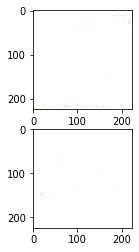

In [ ]:
gen = batch_generator(train_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

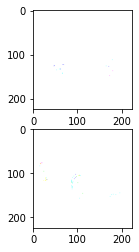

In [ ]:
gen = batch_generator(val_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

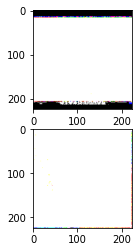

In [ ]:
gen = batch_generator(test_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

#### Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, #Do not include FC layer at the end
                                       input_shape=(224, 224, 3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

#### Un-Freeze Few layers of Pre-trained model

In [ ]:
len(model.layers)

813

In [ ]:
model.layers

In [ ]:
# for layer in model.layers:
#     layer.trainable = True

# # # #Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = True
#######Unfreezing all layers after layer#
for layer in model.layers[0:351]:
    layer.trainable = False
    # print(layer)

In [ ]:
model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2560) dtype=float32 (created by layer 'top_activation')>

#### Add Final layers to the model

In [ ]:
#get Output layer of Pre-trained model
x1 = model.output

#Flatten the output to feed to Dense layer
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

#Add one Dense layer
x3 = tf.keras.layers.Dense(2560, activation='relu')(x2)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x3)

#### Build layer for Classification Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x5)

In [ ]:
label_output

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'class_op')>

#### Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid', 
                                    name='reg_op')(x5)

In [ ]:
bbox_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reg_op')>

#### Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

#### Define function to calculate IoU

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
optimizerVar = tf.keras.optimizers.Adam()
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

#### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(val_df, batch_size=batchsize)

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/MachineLearning/CapstoneProject/tempCSV/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_class_op_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history_1 = final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize, callbacks=[model_checkpoint_callback])


Epoch 1/10
100/100 [==============================] - 786s 8s/step - loss: 3.8117 - class_op_loss: 3.7453 - reg_op_loss: 0.0665 - class_op_accuracy: 0.3333 - reg_op_IoU: 0.3564 - val_loss: 3.9738 - val_class_op_loss: 3.9593 - val_reg_op_loss: 0.0145 - val_class_op_accuracy: 0.2013 - val_reg_op_IoU: 0.6461
Epoch 2/10
100/100 [==============================] - 341s 3s/step - loss: 1.5243 - class_op_loss: 1.5082 - reg_op_loss: 0.0161 - class_op_accuracy: 0.6575 - reg_op_IoU: 0.5982 - val_loss: 2.9140 - val_class_op_loss: 2.8939 - val_reg_op_loss: 0.0201 - val_class_op_accuracy: 0.4141 - val_reg_op_IoU: 0.6518
Epoch 3/10
100/100 [==============================] - 201s 2s/step - loss: 0.7809 - class_op_loss: 0.7678 - reg_op_loss: 0.0130 - class_op_accuracy: 0.8117 - reg_op_IoU: 0.6336 - val_loss: 2.1809 - val_class_op_loss: 2.1686 - val_reg_op_loss: 0.0123 - val_class_op_accuracy: 0.5763 - val_reg_op_IoU: 0.6756
Epoch 4/10
100/100 [==============================] - 147s 1s/step - loss: 0.62

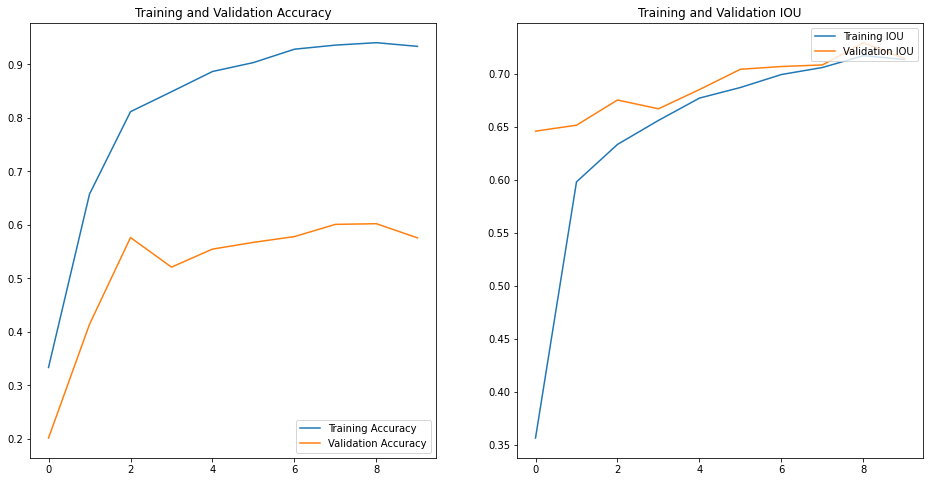

In [ ]:
acc = history_1.history['class_op_accuracy']
val_acc = history_1.history['val_class_op_accuracy']

iou = history_1.history['reg_op_IoU']
val_iou = history_1.history['val_reg_op_IoU']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
optimizerVar = tf.keras.optimizers.Adam(lr=0.0001)
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batchsize=16
history_2 = final_model.fit(train_generator,
                epochs=25,
                initial_epoch=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 11/25
402/402 [==============================] - 511s 1s/step - loss: 0.0450 - class_op_loss: 0.0396 - reg_op_loss: 0.0054 - class_op_accuracy: 0.9897 - reg_op_IoU: 0.7544 - val_loss: 1.2662 - val_class_op_loss: 1.2611 - val_reg_op_loss: 0.0050 - val_class_op_accuracy: 0.7493 - val_reg_op_IoU: 0.7681
Epoch 12/25
402/402 [==============================] - 483s 1s/step - loss: 0.0158 - class_op_loss: 0.0117 - reg_op_loss: 0.0041 - class_op_accuracy: 0.9977 - reg_op_IoU: 0.7793 - val_loss: 1.1882 - val_class_op_loss: 1.1837 - val_reg_op_loss: 0.0044 - val_class_op_accuracy: 0.7665 - val_reg_op_IoU: 0.7797
Epoch 13/25
402/402 [==============================] - 477s 1s/step - loss: 0.0114 - class_op_loss: 0.0082 - reg_op_loss: 0.0032 - class_op_accuracy: 0.9983 - reg_op_IoU: 0.7962 - val_loss: 1.1556 - val_class_op_loss: 1.1515 - val_reg_op_loss: 0.0041 - val_class_op_accuracy: 0.7782 - val_reg_op_IoU: 0.7844
Epoch 14/25
402/402 [==============================] - 478s 1s/step - loss: 

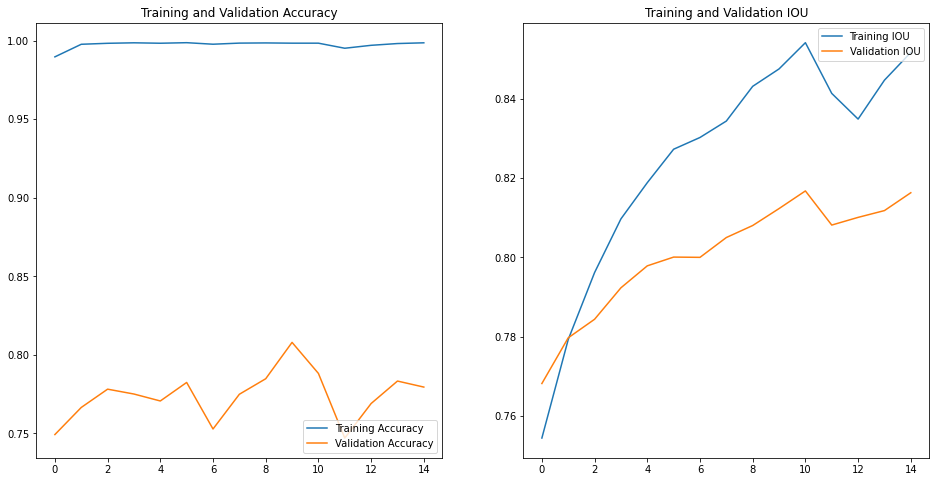

In [ ]:
acc = history_2.history['class_op_accuracy']
val_acc = history_2.history['val_class_op_accuracy']

iou = history_2.history['reg_op_IoU']
val_iou = history_2.history['val_reg_op_IoU']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
final_model.save('/content/drive/MyDrive/MachineLearning/CapstoneProject/savedModels/Cars_196_dataset_localization_Adam_EfficientNet_B7_Epoch30_V1.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    act_class = df.loc[image_num, 'carName']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    
    #Draw actual bounding box - Red
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box -  Green
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3
                        )

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [ ]:
#Predict on Test Dataset
for i in range(0,5):
  image_num = np.random.randint(0, test_df.shape[0])
  predict_and_draw(image_num, test_df)

The output of above cell is cleared since it was having images and was consuming lot of space, leading to a huge size of the notebook.

In [ ]:
testData_generator = batch_generator(test_df, batch_size=64)

print('Evaluating')
test_results = final_model.evaluate(testData_generator, batch_size = 32, steps = 250, workers = 2, use_multiprocessing = True, return_dict = True , verbose=1)
print('\nTest accuracy:', test_results)

Evaluating
250/250 [==============================] - 2418s 10s/step - loss: 1.1533 - class_op_loss: 1.1504 - reg_op_loss: 0.0029 - class_op_accuracy: 0.7966 - reg_op_IoU: 0.8201

Test accuracy: {'loss': 1.153328776359558, 'class_op_loss': 1.1504391431808472, 'reg_op_loss': 0.00288954796269536, 'class_op_accuracy': 0.796625018119812, 'reg_op_IoU': 0.8201269507408142}


In [ ]:
# act_class = pd.DataFrame()
# pred_class = pd.DataFrame()

dataF = pd.DataFrame(columns=['Actual','Pred'])

def predict_and_develop_dataFrame(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array, use_multiprocessing = True, )
    #Get classification and regression predictions
    label_pred = pred[0][0]

    #Read actual label 
    # act_class.append((df.loc[image_num, 'carName']).to_frame(), ignore_index = True)
    # # pred_class.append(label_class_dict[np.argmax(label_pred)], ignore_index = True)
    to_append = [df.loc[image_num, 'carName'], label_class_dict[np.argmax(label_pred)]]
    
    # print((to_append))
    # print('Real Label :', df.loc[image_num, 'carName'], '\nPredicted Label: ', label_class_dict[np.argmax(label_pred)])

    df_length = len(dataF)
    dataF.loc[df_length] = to_append

In [ ]:
 for i in range(0,8041):
  predict_and_develop_dataFrame(i,test_df)

In [ ]:
from sklearn.metrics import classification_report
y_true = dataF['Actual']
y_pred = dataF['Pred']
target_names = dataF['Actual'].unique()
print(classification_report(y_true, y_pred, target_names=target_names))

                                                        precision    recall  f1-score   support

                             Acura Integra Type R 2001       0.89      0.95      0.92        44
                                   Acura RL Sedan 2012       0.92      0.80      0.85        44
                                   Acura TL Sedan 2012       0.59      0.62      0.61        32
                                  Acura TL Type-S 2008       0.81      0.88      0.84        43
                                  Acura TSX Sedan 2012       0.78      0.83      0.80        42
                              Acura ZDX Hatchback 2012       0.88      0.70      0.78        40
                            AM General Hummer SUV 2000       0.68      0.72      0.70        39
              Aston Martin V8 Vantage Convertible 2012       0.63      0.60      0.61        45
                    Aston Martin V8 Vantage Coupe 2012       0.63      0.54      0.58        41
                  Aston Martin Virage C

  Above is the classification report

Above  mentioned table is the classification report for EfficientNet-B5 model. Overall Accuracy is 79%, Precision is 78%, recall is 78% and f1-Score is 78%. As observed in the classification report, for a few classes the number is low and the same is observed in test samples where the model is showing misclassification. The number of samples used for producing reports is 8041. In EfficientNet, the authors propose a new Scaling method called Compound Scaling. 


## Model building for Efficient Net B5

#### Build a Batch Generator

In [ ]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        for i in range(batch_size):
            batch_images[i] = tf.keras.applications.efficientnet.preprocess_input(batch_images[i])
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Checking the output of the batch generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

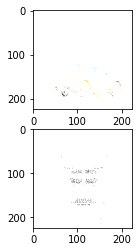

In [ ]:
gen = batch_generator(train_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

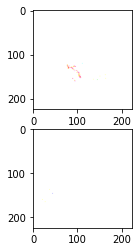

In [ ]:
gen = batch_generator(val_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

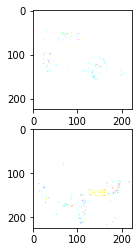

In [ ]:
gen = batch_generator(test_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

#### Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, #Do not include FC layer at the end
                                       input_shape=(224, 224, 3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

#### Un-Freeze Few layers of Pre-trained model

In [ ]:
len(model.layers)

576

In [ ]:
# for layer in model.layers:
#     layer.trainable = True

# # # #Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = True
#######Unfreezing all layers after layer#
for layer in model.layers[0:257]:
    layer.trainable = False
    # print(layer)

In [ ]:
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'top_activation')>

#### Add Final layers to the model

In [ ]:
#get Output layer of Pre-trained model
x1 = model.output

#Flatten the output to feed to Dense layer
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

#Add one Dense layer
x3 = tf.keras.layers.Dense(2048, activation='relu')(x2)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x3)

#### Build layer for Classification Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x5)

In [ ]:
label_output

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'class_op')>

#### Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid', 
                                    name='reg_op')(x5)

In [ ]:
bbox_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reg_op')>

#### Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

#### Define function to calculate IoU

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
optimizerVar = tf.keras.optimizers.Adam()
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

#### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(val_df, batch_size=batchsize)

In [ ]:
history_1 = final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 1/10
100/100 [==============================] - 176s 1s/step - loss: 3.5079 - class_op_loss: 3.4325 - reg_op_loss: 0.0754 - class_op_accuracy: 0.3677 - reg_op_IoU: 0.3243 - val_loss: 3.4405 - val_class_op_loss: 3.4271 - val_reg_op_loss: 0.0134 - val_class_op_accuracy: 0.2819 - val_reg_op_IoU: 0.6578
Epoch 2/10
100/100 [==============================] - 119s 1s/step - loss: 1.1883 - class_op_loss: 1.1717 - reg_op_loss: 0.0166 - class_op_accuracy: 0.7283 - reg_op_IoU: 0.5901 - val_loss: 2.4759 - val_class_op_loss: 2.4636 - val_reg_op_loss: 0.0123 - val_class_op_accuracy: 0.4171 - val_reg_op_IoU: 0.6647
Epoch 3/10
100/100 [==============================] - 119s 1s/step - loss: 0.6474 - class_op_loss: 0.6353 - reg_op_loss: 0.0120 - class_op_accuracy: 0.8467 - reg_op_IoU: 0.6439 - val_loss: 1.8926 - val_class_op_loss: 1.8821 - val_reg_op_loss: 0.0105 - val_class_op_accuracy: 0.5565 - val_reg_op_IoU: 0.6884
Epoch 4/10
100/100 [==============================] - 115s 1s/step - loss: 0.40

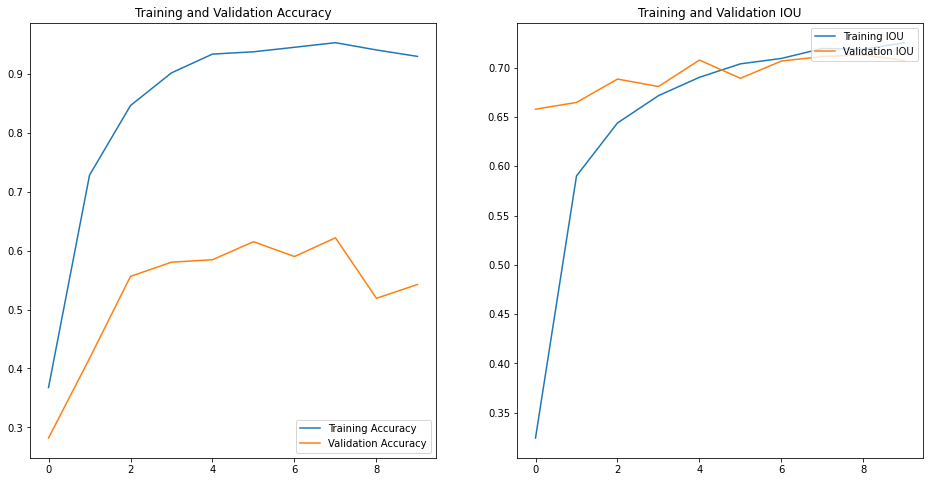

In [ ]:
acc = history_1.history['class_op_accuracy']
val_acc = history_1.history['val_class_op_accuracy']

iou = history_1.history['reg_op_IoU']
val_iou = history_1.history['val_reg_op_IoU']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
optimizerVar = tf.keras.optimizers.Adam(lr=0.0001)
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batchsize=16
history_2 = final_model.fit(train_generator,
                epochs=25,
                initial_epoch=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 11/25
402/402 [==============================] - 524s 1s/step - loss: 0.0559 - class_op_loss: 0.0503 - reg_op_loss: 0.0055 - class_op_accuracy: 0.9865 - reg_op_IoU: 0.7572 - val_loss: 1.3430 - val_class_op_loss: 1.3375 - val_reg_op_loss: 0.0055 - val_class_op_accuracy: 0.7351 - val_reg_op_IoU: 0.7636
Epoch 12/25
402/402 [==============================] - 466s 1s/step - loss: 0.0142 - class_op_loss: 0.0100 - reg_op_loss: 0.0042 - class_op_accuracy: 0.9980 - reg_op_IoU: 0.7794 - val_loss: 1.3080 - val_class_op_loss: 1.3029 - val_reg_op_loss: 0.0051 - val_class_op_accuracy: 0.7332 - val_reg_op_IoU: 0.7700
Epoch 13/25
402/402 [==============================] - 473s 1s/step - loss: 0.0120 - class_op_loss: 0.0086 - reg_op_loss: 0.0034 - class_op_accuracy: 0.9981 - reg_op_IoU: 0.7957 - val_loss: 1.3267 - val_class_op_loss: 1.3221 - val_reg_op_loss: 0.0046 - val_class_op_accuracy: 0.7338 - val_reg_op_IoU: 0.7791
Epoch 14/25
402/402 [==============================] - 472s 1s/step - loss: 

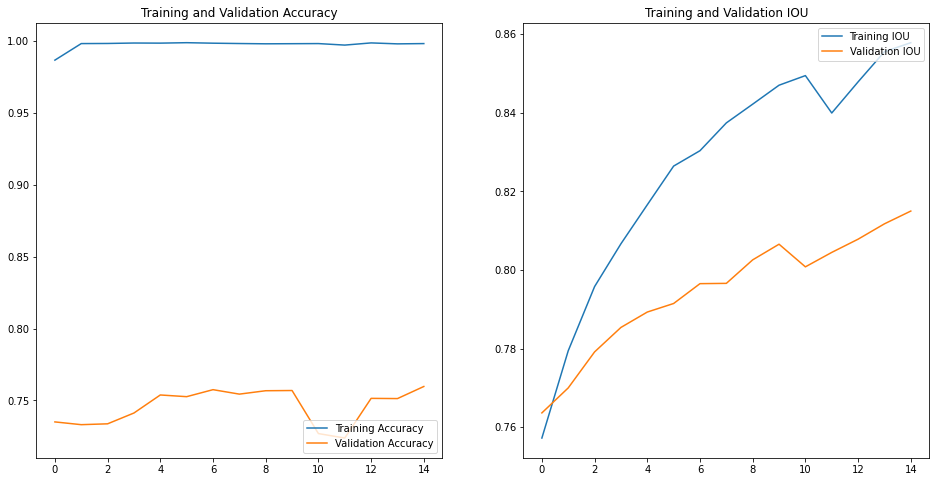

In [ ]:
acc = history_2.history['class_op_accuracy']
val_acc = history_2.history['val_class_op_accuracy']

iou = history_2.history['reg_op_IoU']
val_iou = history_2.history['val_reg_op_IoU']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
final_model.save('/content/drive/MyDrive/MachineLearning/CapstoneProject/savedModels/Cars_196_dataset_localization_Adam_EfficientNet_Epoch30_V1.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    act_class = df.loc[image_num, 'carName']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    
    #Draw actual bounding box - Red
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box -  Green
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3
                        )

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [ ]:
#Predict on Test Dataset
for i in range(0,5):
  image_num = np.random.randint(0, test_df.shape[0])
  predict_and_draw(image_num, test_df)

The output of above cell is cleared since it was having images and was consuming lot of space, leading to a huge size of the notebook.

In [ ]:
testData_generator = batch_generator(test_df, batch_size=64)

print('Evaluating')
test_results = final_model.evaluate(testData_generator, batch_size = 32, steps = 250, workers = 2, use_multiprocessing = True, return_dict = True , verbose=1)
print('\nTest accuracy:', test_results)

Evaluating
250/250 [==============================] - 196s 780ms/step - loss: 1.2713 - class_op_loss: 1.2681 - reg_op_loss: 0.0031 - class_op_accuracy: 0.7513 - reg_op_IoU: 0.8126

Test accuracy: {'loss': 1.2712697982788086, 'class_op_loss': 1.268125295639038, 'reg_op_loss': 0.003145831171423197, 'class_op_accuracy': 0.7512500286102295, 'reg_op_IoU': 0.8126088380813599}


In [ ]:
# act_class = pd.DataFrame()
# pred_class = pd.DataFrame()

dataF = pd.DataFrame(columns=['Actual','Pred'])

def predict_and_develop_dataFrame(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array, use_multiprocessing = True, )
    #Get classification and regression predictions
    label_pred = pred[0][0]

    #Read actual label 
    # act_class.append((df.loc[image_num, 'carName']).to_frame(), ignore_index = True)
    # # pred_class.append(label_class_dict[np.argmax(label_pred)], ignore_index = True)
    to_append = [df.loc[image_num, 'carName'], label_class_dict[np.argmax(label_pred)]]
    
    # print((to_append))
    # print('Real Label :', df.loc[image_num, 'carName'], '\nPredicted Label: ', label_class_dict[np.argmax(label_pred)])

    df_length = len(dataF)
    dataF.loc[df_length] = to_append

In [ ]:
 for i in range(0,8041):
  predict_and_develop_dataFrame(i,test_df)

In [ ]:
from sklearn.metrics import classification_report
y_true = dataF['Actual']
y_pred = dataF['Pred']
target_names = dataF['Actual'].unique()
print(classification_report(y_true, y_pred, target_names=target_names))

                                                        precision    recall  f1-score   support

                             Acura Integra Type R 2001       0.92      0.82      0.87        44
                                   Acura RL Sedan 2012       0.95      0.82      0.88        44
                                   Acura TL Sedan 2012       0.63      0.59      0.61        32
                                  Acura TL Type-S 2008       0.61      0.77      0.68        43
                                  Acura TSX Sedan 2012       0.78      0.76      0.77        42
                              Acura ZDX Hatchback 2012       0.73      0.68      0.70        40
                            AM General Hummer SUV 2000       0.79      0.56      0.66        39
              Aston Martin V8 Vantage Convertible 2012       0.51      0.49      0.50        45
                    Aston Martin V8 Vantage Coupe 2012       0.67      0.44      0.53        41
                  Aston Martin Virage C

  Above is the classification report

Below mentioned table classification report for EfficientNet-B5 model. Overall Accuracy is 75%, Precision is 75%, recall is 74% and f1-Score is 74%. As observed in the classification report, for a few classes the number is low and the same is observed in test samples where the model is showing misclassification. The number of samples used for producing reports is 8041. In EfficientNet, the authors propose a new Scaling method called Compound Scaling. 



## Model building for ResNet

#### Build a Batch Generator

In [ ]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        for i in range(batch_size):
            batch_images[i] = tf.keras.applications.resnet.preprocess_input(batch_images[i])
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Checking the output of the batch generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

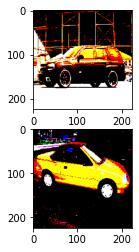

In [ ]:
gen = batch_generator(train_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

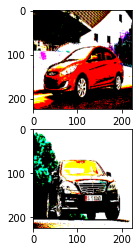

In [ ]:
gen = batch_generator(val_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

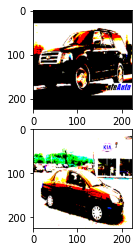

In [ ]:
gen = batch_generator(test_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

#### Build the Model

#### Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.applications.resnet50 import ResNet50

model = tf.keras.applications.ResNet50(include_top=False, #Do not include FC layer at the end
                                       input_shape=(224, 224, 3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

#### Un-Freeze Few layers of Pre-trained model

In [ ]:
len(model.layers)

175

In [ ]:
# for layer in model.layers:
#     layer.trainable = True

# # # #Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = True
# #######Unfreezing all layers after layer#
# for layer in model.layers[0:257]:
#     layer.trainable = False
#     # print(layer)

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

#### Add Final layers to the model

In [ ]:
#get Output layer of Pre-trained model
x1 = model.output

#Flatten the output to feed to Dense layer
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

#Add one Dense layer
x4_1 = tf.keras.layers.Dense(2048, activation='relu')(x2)

#Add one Dense layer
x4_2 = tf.keras.layers.Dense(512, activation='relu')(x4_1)

x4 = tf.keras.layers.Dropout(0.1)(x4_2)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x4)

#### Build layer for Classification Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x5)

In [ ]:
label_output

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'class_op')>

#### Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid', 
                                    name='reg_op')(x5)

In [ ]:
bbox_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reg_op')>

#### Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

#### Define function to calculate IoU

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
optimizerVar = tf.keras.optimizers.Adam()
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

#### Train the model

In [ ]:
#Create train and test generator
batchsize = 32
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(val_df, batch_size=batchsize)

In [ ]:
history_1 = final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 1/10
201/201 [==============================] - 135s 580ms/step - loss: 5.4409 - class_op_loss: 5.3947 - reg_op_loss: 0.0462 - class_op_accuracy: 0.0082 - reg_op_IoU: 0.4970 - val_loss: 2885.8916 - val_class_op_loss: 2885.3137 - val_reg_op_loss: 0.5780 - val_class_op_accuracy: 0.0059 - val_reg_op_IoU: 0.0000e+00
Epoch 2/10
201/201 [==============================] - 115s 576ms/step - loss: 5.3306 - class_op_loss: 5.3124 - reg_op_loss: 0.0183 - class_op_accuracy: 0.0098 - reg_op_IoU: 0.6555 - val_loss: 9.6827 - val_class_op_loss: 9.6595 - val_reg_op_loss: 0.0232 - val_class_op_accuracy: 0.0071 - val_reg_op_IoU: 0.6582
Epoch 3/10
201/201 [==============================] - 113s 566ms/step - loss: 5.2858 - class_op_loss: 5.2686 - reg_op_loss: 0.0172 - class_op_accuracy: 0.0096 - reg_op_IoU: 0.6668 - val_loss: 7.8722 - val_class_op_loss: 7.8486 - val_reg_op_loss: 0.0236 - val_class_op_accuracy: 0.0053 - val_reg_op_IoU: 0.6121
Epoch 4/10
201/201 [==============================] - 116s 5

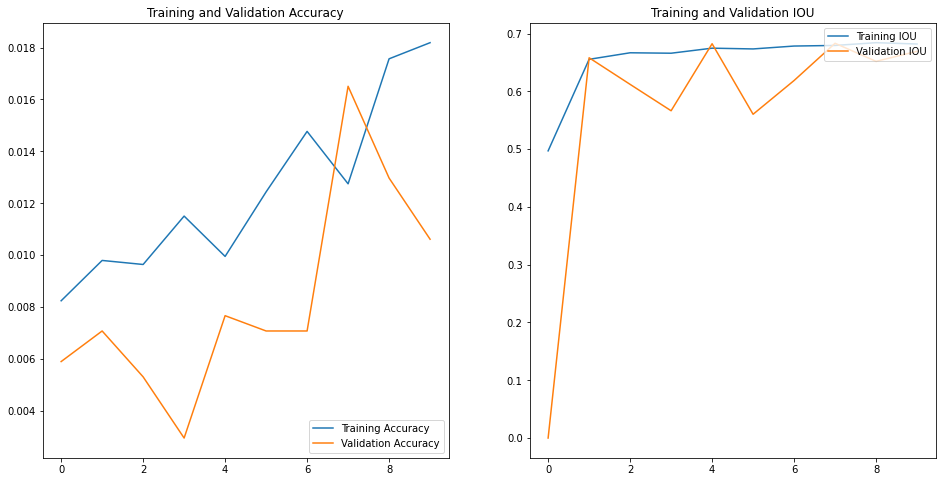

In [ ]:
acc = history_1.history['class_op_accuracy']
val_acc = history_1.history['val_class_op_accuracy']

iou = history_1.history['reg_op_IoU']
val_iou = history_1.history['val_reg_op_IoU']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
optimizerVar = tf.keras.optimizers.Adam(lr=0.0001)
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batchsize=16
history_2 = final_model.fit(train_generator,
                epochs=25,
                initial_epoch=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 11/25
402/402 [==============================] - 246s 593ms/step - loss: 4.9739 - class_op_loss: 4.9583 - reg_op_loss: 0.0156 - class_op_accuracy: 0.0280 - reg_op_IoU: 0.6842 - val_loss: 5.0944 - val_class_op_loss: 5.0796 - val_reg_op_loss: 0.0149 - val_class_op_accuracy: 0.0212 - val_reg_op_IoU: 0.6977
Epoch 12/25
402/402 [==============================] - 238s 593ms/step - loss: 4.8692 - class_op_loss: 4.8536 - reg_op_loss: 0.0156 - class_op_accuracy: 0.0347 - reg_op_IoU: 0.6842 - val_loss: 4.9339 - val_class_op_loss: 4.9194 - val_reg_op_loss: 0.0146 - val_class_op_accuracy: 0.0339 - val_reg_op_IoU: 0.6974
Epoch 13/25
402/402 [==============================] - 235s 586ms/step - loss: 4.7556 - class_op_loss: 4.7402 - reg_op_loss: 0.0154 - class_op_accuracy: 0.0424 - reg_op_IoU: 0.6862 - val_loss: 4.9807 - val_class_op_loss: 4.9659 - val_reg_op_loss: 0.0148 - val_class_op_accuracy: 0.0348 - val_reg_op_IoU: 0.6949
Epoch 14/25
402/402 [==============================] - 241s 601ms/s

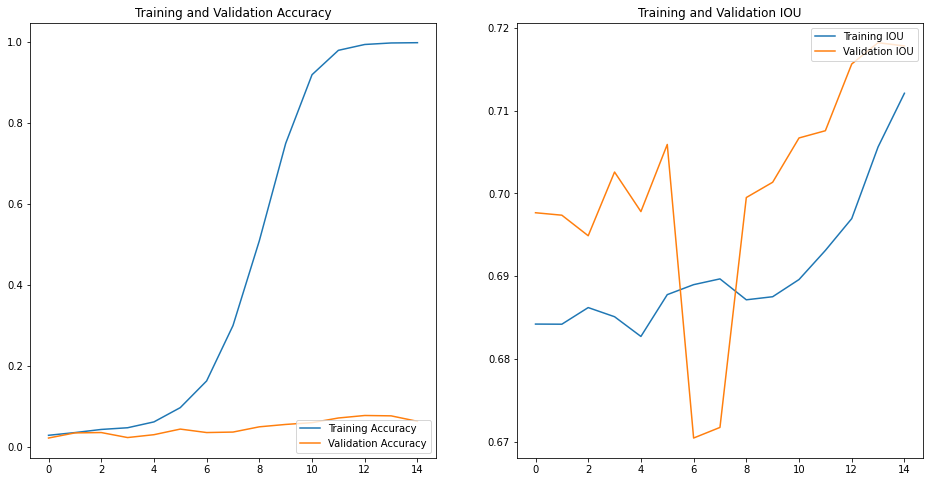

In [ ]:
acc = history_2.history['class_op_accuracy']
val_acc = history_2.history['val_class_op_accuracy']

iou = history_2.history['reg_op_IoU']
val_iou = history_2.history['val_reg_op_IoU']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
final_model.save('/content/drive/MyDrive/MachineLearning/CapstoneProject/savedModels/Cars_196_dataset_localization_Adam_ResNetNet_Epoch30_V1.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    act_class = df.loc[image_num, 'carName']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    
    #Draw actual bounding box - Red
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box -  Green
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3
                        )

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [ ]:
#Predict on Test Dataset
for i in range(0,5):
  image_num = np.random.randint(0, test_df.shape[0])
  predict_and_draw(image_num, test_df)

The output of above cell is cleared since it was having images and was consuming lot of space, leading to a huge size of the notebook.

In [ ]:
testData_generator = batch_generator(test_df, batch_size=64)

print('Evaluating')
test_results = final_model.evaluate(testData_generator, batch_size = 32, steps = 250, workers = 2, use_multiprocessing = True, return_dict = True , verbose=1)
print('\nTest accuracy:', test_results)

Evaluating
250/250 [==============================] - 1368s 5s/step - loss: 4.8825 - class_op_loss: 4.8726 - reg_op_loss: 0.0100 - class_op_accuracy: 0.0672 - reg_op_IoU: 0.7254

Test accuracy: {'loss': 4.882508277893066, 'class_op_loss': 4.8725504875183105, 'reg_op_loss': 0.00995517335832119, 'class_op_accuracy': 0.06724999845027924, 'reg_op_IoU': 0.7253609895706177}


In [ ]:
# act_class = pd.DataFrame()
# pred_class = pd.DataFrame()

dataF = pd.DataFrame(columns=['Actual','Pred'])

def predict_and_develop_dataFrame(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array, use_multiprocessing = True, )
    #Get classification and regression predictions
    label_pred = pred[0][0]

    #Read actual label 
    # act_class.append((df.loc[image_num, 'carName']).to_frame(), ignore_index = True)
    # # pred_class.append(label_class_dict[np.argmax(label_pred)], ignore_index = True)
    to_append = [df.loc[image_num, 'carName'], label_class_dict[np.argmax(label_pred)]]
    
    # print((to_append))
    # print('Real Label :', df.loc[image_num, 'carName'], '\nPredicted Label: ', label_class_dict[np.argmax(label_pred)])

    df_length = len(dataF)
    dataF.loc[df_length] = to_append

In [ ]:
 for i in range(0,8041):
  predict_and_develop_dataFrame(i,test_df)

In [ ]:
dataF

Actual                                  Pred
0     Acura Integra Type R 2001  Chrysler PT Cruiser Convertible 2008
1     Acura Integra Type R 2001           Lincoln Town Car Sedan 2011
2     Acura Integra Type R 2001                  GMC Terrain SUV 2012
3     Acura Integra Type R 2001    Chevrolet Malibu Hybrid Sedan 2010
4     Acura Integra Type R 2001                Dodge Journey SUV 2012
...                         ...                                   ...
8036    Toyota Sequoia SUV 2012                Dodge Journey SUV 2012
8037    Toyota Sequoia SUV 2012           Chevrolet Malibu Sedan 2007
8038    Toyota Sequoia SUV 2012             Hyundai Veracruz SUV 2012
8039    Toyota Sequoia SUV 2012           Ford Expedition EL SUV 2009
8040    Toyota Sequoia SUV 2012               Toyota Sequoia SUV 2012

[8041 rows x 2 columns]

In [ ]:
from sklearn.metrics import classification_report
y_true = dataF['Actual']
y_pred = dataF['Pred']
target_names = dataF['Actual'].unique()
print(classification_report(y_true, y_pred, target_names=target_names))

                                                        precision    recall  f1-score   support

                             Acura Integra Type R 2001       0.00      0.00      0.00        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        44
                                   Acura TL Sedan 2012       0.00      0.00      0.00        32
                                  Acura TL Type-S 2008       0.00      0.00      0.00        43
                                  Acura TSX Sedan 2012       0.03      0.02      0.03        42
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        40
                            AM General Hummer SUV 2000       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.00        41
                  Aston Martin Virage C

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Above is the classification report

  Below mentioned table classification report is for Resnet50 model. Overall Accuracy is low for this model. The problem observed for ResNet50 is that the network doesn’t learn well. ResNet follows the conventional approach of scaling the dimensions arbitrarily and by adding up more and more layers. As observed, ResNet is not suitable for this use case. There are misclassifications observed and bounding boxes which are overlaid by model  on the image are misaligned. The number of samples used for producing reports is 8041.


## Model building for Mobile Net

#### Build a Batch Generator

In [ ]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        for i in range(batch_size):
            batch_images[i] = tf.keras.applications.mobilenet_v2.preprocess_input(batch_images[i])
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Checking the output of the batch generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

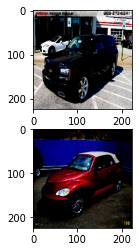

In [ ]:
gen = batch_generator(train_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

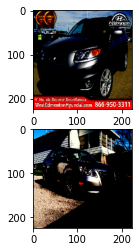

In [ ]:
gen = batch_generator(val_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

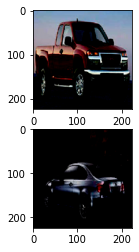

In [ ]:
gen = batch_generator(test_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

#### Build the Model

#### Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.applications.MobileNetV2(include_top=False, #Do not include FC layer at the end
                                       input_shape=(224, 224, 3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

#### Un-Freeze Few layers of Pre-trained model

In [ ]:
len(model.layers)

154

In [ ]:
# for layer in model.layers:
#     layer.trainable = True

# # # #Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = True
# #######Unfreezing all layers after layer#
# for layer in model.layers[0:257]:
#     layer.trainable = False
#     # print(layer)

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'out_relu')>

#### Add Final layers to the model

In [ ]:
#get Output layer of Pre-trained model
x1 = model.output

#Flatten the output to feed to Dense layer
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

x3 = tf.keras.layers.Dropout(0.2)(x2)

#Add one Dense layer
x4_1 = tf.keras.layers.Dense(1280, activation='relu')(x3)

x4_2 = tf.keras.layers.Dropout(0.15)(x4_1)

#Add one Dense layer
x4_3 = tf.keras.layers.Dense(640, activation='relu')(x4_2)

x4_4 = tf.keras.layers.Dropout(0.05)(x4_3)

#Add one Dense layer
x4 = tf.keras.layers.Dense(320, activation='relu')(x4_4)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x4)

#### Build layer for Classification Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x5)

In [ ]:
label_output

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'class_op')>

#### Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid', 
                                    name='reg_op')(x5)

In [ ]:
bbox_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reg_op')>

#### Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#### Define function to calculate IoU

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
optimizerVar = tf.keras.optimizers.Adam()
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

#### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(val_df, batch_size=batchsize)

In [ ]:
history_1 = final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 1/10
100/100 [==============================] - 111s 1s/step - loss: 4.7018 - class_op_loss: 4.6193 - reg_op_loss: 0.0825 - class_op_accuracy: 0.0830 - reg_op_IoU: 0.3033 - val_loss: 15.6615 - val_class_op_loss: 15.5165 - val_reg_op_loss: 0.1450 - val_class_op_accuracy: 0.0066 - val_reg_op_IoU: 0.0944
Epoch 2/10
100/100 [==============================] - 92s 927ms/step - loss: 2.9780 - class_op_loss: 2.9572 - reg_op_loss: 0.0208 - class_op_accuracy: 0.3030 - reg_op_IoU: 0.5878 - val_loss: 12.3995 - val_class_op_loss: 12.1656 - val_reg_op_loss: 0.2339 - val_class_op_accuracy: 0.0240 - val_reg_op_IoU: 0.0338
Epoch 3/10
100/100 [==============================] - 89s 899ms/step - loss: 1.7821 - class_op_loss: 1.7661 - reg_op_loss: 0.0159 - class_op_accuracy: 0.5689 - reg_op_IoU: 0.6431 - val_loss: 12.2419 - val_class_op_loss: 12.2101 - val_reg_op_loss: 0.0318 - val_class_op_accuracy: 0.0246 - val_reg_op_IoU: 0.6187
Epoch 4/10
100/100 [==============================] - 90s 906ms/step 

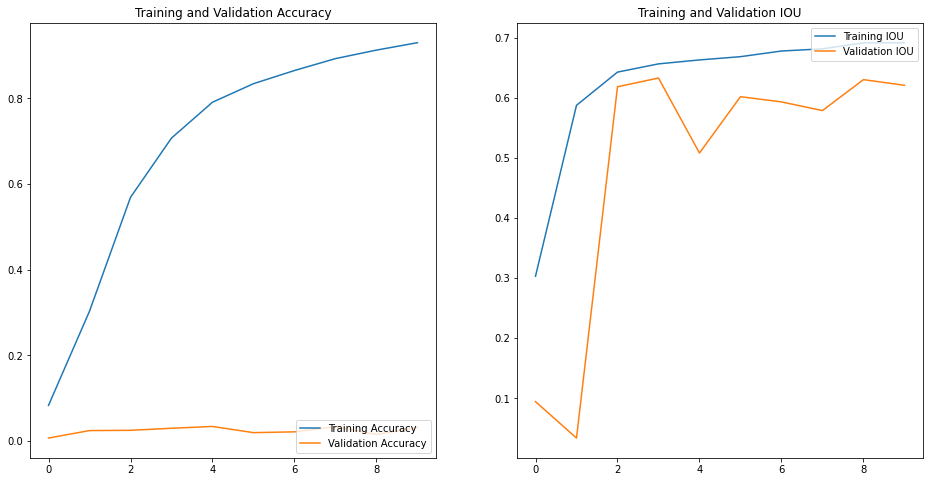

In [ ]:
acc = history_1.history['class_op_accuracy']
val_acc = history_1.history['val_class_op_accuracy']

iou = history_1.history['reg_op_IoU']
val_iou = history_1.history['val_reg_op_IoU']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
optimizerVar = tf.keras.optimizers.Adam(lr=0.0001)
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batchsize=16
history_2 = final_model.fit(train_generator,
                epochs=25,
                initial_epoch=10,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 11/25
402/402 [==============================] - 366s 900ms/step - loss: 0.0656 - class_op_loss: 0.0547 - reg_op_loss: 0.0109 - class_op_accuracy: 0.9889 - reg_op_IoU: 0.7061 - val_loss: 6.8791 - val_class_op_loss: 6.8636 - val_reg_op_loss: 0.0155 - val_class_op_accuracy: 0.1209 - val_reg_op_IoU: 0.6532
Epoch 12/25
402/402 [==============================] - 364s 907ms/step - loss: 0.0261 - class_op_loss: 0.0173 - reg_op_loss: 0.0088 - class_op_accuracy: 0.9977 - reg_op_IoU: 0.7220 - val_loss: 3.4839 - val_class_op_loss: 3.4720 - val_reg_op_loss: 0.0119 - val_class_op_accuracy: 0.3766 - val_reg_op_IoU: 0.6879
Epoch 13/25
402/402 [==============================] - 366s 911ms/step - loss: 0.0185 - class_op_loss: 0.0113 - reg_op_loss: 0.0073 - class_op_accuracy: 0.9982 - reg_op_IoU: 0.7371 - val_loss: 1.9473 - val_class_op_loss: 1.9372 - val_reg_op_loss: 0.0101 - val_class_op_accuracy: 0.5752 - val_reg_op_IoU: 0.6981
Epoch 14/25
402/402 [==============================] - 362s 902ms/s

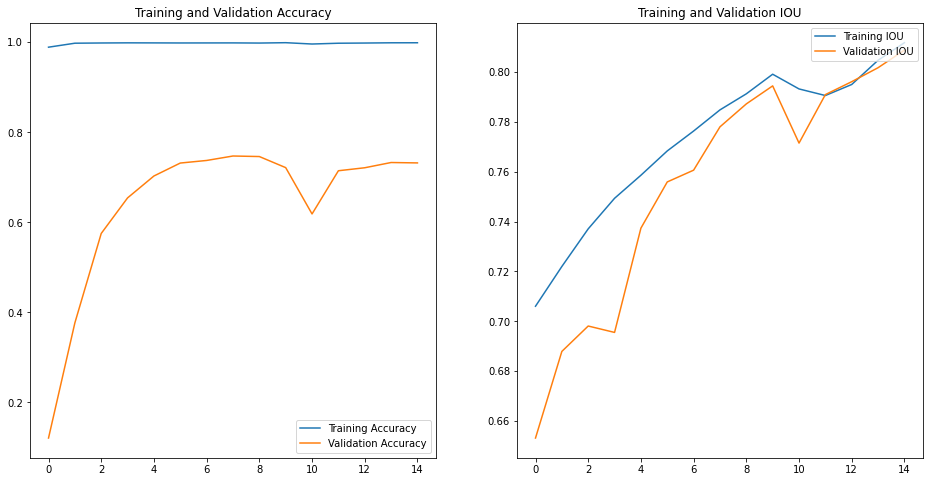

In [ ]:
acc = history_2.history['class_op_accuracy']
val_acc = history_2.history['val_class_op_accuracy']

iou = history_2.history['reg_op_IoU']
val_iou = history_2.history['val_reg_op_IoU']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, iou, label='Training IOU')
plt.plot(epochs_range, val_iou, label='Validation IOU')
plt.legend(loc='upper right')
plt.title('Training and Validation IOU')
plt.show()

In [ ]:
final_model.save('/content/drive/MyDrive/MachineLearning/CapstoneProject/savedModels/Cars_196_dataset_localization_Adam_MobileNet_Epoch30_V1.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    act_class = df.loc[image_num, 'carName']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    
    #Draw actual bounding box - Red
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box -  Green
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3
                        )

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [ ]:
#Predict on Test Dataset
for i in range(0,5):
  image_num = np.random.randint(0, test_df.shape[0])
  predict_and_draw(image_num, test_df)

The output of above cell is cleared since it was having images and was consuming lot of space, leading to a huge size of the notebook.

In [ ]:
testData_generator = batch_generator(test_df, batch_size=64)

print('Evaluating')
test_results = final_model.evaluate(testData_generator, batch_size = 32, steps = 250, workers = 2, use_multiprocessing = True, return_dict = True , verbose=1)
print('\nTest accuracy:', test_results)

Evaluating
250/250 [==============================] - 1670s 7s/step - loss: 1.1432 - class_op_loss: 1.1402 - reg_op_loss: 0.0030 - class_op_accuracy: 0.7411 - reg_op_IoU: 0.8121

Test accuracy: {'loss': 1.1431705951690674, 'class_op_loss': 1.1401729583740234, 'reg_op_loss': 0.0029981073457747698, 'class_op_accuracy': 0.7411249876022339, 'reg_op_IoU': 0.8120642304420471}


In [ ]:
# act_class = pd.DataFrame()
# pred_class = pd.DataFrame()

dataF = pd.DataFrame(columns=['Actual','Pred'])

def predict_and_develop_dataFrame(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.efficientnet.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array, use_multiprocessing = True, )
    #Get classification and regression predictions
    label_pred = pred[0][0]

    #Read actual label 
    # act_class.append((df.loc[image_num, 'carName']).to_frame(), ignore_index = True)
    # # pred_class.append(label_class_dict[np.argmax(label_pred)], ignore_index = True)
    to_append = [df.loc[image_num, 'carName'], label_class_dict[np.argmax(label_pred)]]
    
    # print((to_append))
    # print('Real Label :', df.loc[image_num, 'carName'], '\nPredicted Label: ', label_class_dict[np.argmax(label_pred)])

    df_length = len(dataF)
    dataF.loc[df_length] = to_append

In [ ]:
 for i in range(0,8041):
  predict_and_develop_dataFrame(i,test_df)

In [ ]:
from sklearn.metrics import classification_report
y_true = dataF['Actual']
y_pred = dataF['Pred']
target_names = dataF['Actual'].unique()
print(classification_report(y_true, y_pred, target_names=target_names))

                                                        precision    recall  f1-score   support

                             Acura Integra Type R 2001       0.19      0.09      0.12        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        44
                                   Acura TL Sedan 2012       0.00      0.00      0.00        32
                                  Acura TL Type-S 2008       0.00      0.00      0.00        43
                                  Acura TSX Sedan 2012       0.00      0.00      0.00        42
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        40
                            AM General Hummer SUV 2000       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.00        41
                  Aston Martin Virage C

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Above is the classification report
Below mentioned table classification report for MobileNet model. Overall Accuracy is low for this model. The problem observed for MobileNet is that the network is a small network and not suitable for this use case, the number of weights which are to be learnt is very less leading to misclassification and bounding boxes which are overlaid by model  on the image are misaligned. The number of samples used for producing reports is 8041

**Conclusion**

As we have observed in above experiments with different CNN models, EfficientNet-b7 is the one which is provide good accuracy and regression output compare to other models. EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. 

Efficient-B7 is having 813 layers and there are aorund 71 million weights to be learned, we have trained here one 67 million parameter and these learning is from layer 357 and later. These later layers are the one which learns in depth about the images and thus have helped to get a good trained model.

We are using categorical_crossentropy for classification and mse for regression. We calculate the overall loss of the model by adding regression loss and classification loss. For calculating accuracy of the bounding box on the images, we have defined a function to calculate IOU. This Intersection over Union is an evaluation metric used to measure the accuracy of an object detector on a particular dataset. Efficientnet-b7 has 813 total layers, from layer number 351 we have made it trainable. This model has 64 Million trainable parameters. The Last layer of the model has GlobalAveragePooling2D, 1 Dense layer and a Batch normalization layer. For classification we have used softmax activation function with 196 classes and for regression we have used sigmoid activation function for 4 coordinates of the bounding box.

Here we have chosen EfficientNet-B7 and since this is an interim submission, we are planning to continue our experiment with other networks and methodologies. We are trying to build YOLO and we are also using the TFOD framework to check which would give the best result. We also started with efficientDet. For final submission we will compare all the models and get the best model deployed and produce a result in a nice user interface.

References 
https://paperswithcode.com/method/efficientnet